In [50]:
from pprint import pprint
from evaluation_data import EvaluationData
from evaluation_helper import EvaluationHelper

# Data evaluation

In [51]:
evaluation_data = EvaluationData(
    file_path="/Users/marleenstreicher/Documents/git/menssana_case_study/data/solutions_case_study_task2_data.csv"
)
data = evaluation_data.data
helper = EvaluationHelper(data)


info = {
    "number of entries":len(data),
    "number of true negative":len(data[data["category"] == "true negative"]),
    "number of true positive":len(data[data["category"] == "true positive"]),
    "number of false negative":len(data[data["category"] == "false negative"]),
    "number of false positive":len(data[data["category"] == "false positive"]),
}
pprint(info)

{'number of entries': 802,
 'number of false negative': 12,
 'number of false positive': 249,
 'number of true negative': 441,
 'number of true positive': 100}


# Model evaluation

## 1. AUC-ROC-Curve

ai_model1_alarm_probability: 0.0439655219454409
ai_model2_alarm_probability: 0.1521944444444444
ai_model3_alarm_probability: 0.1218154579401016


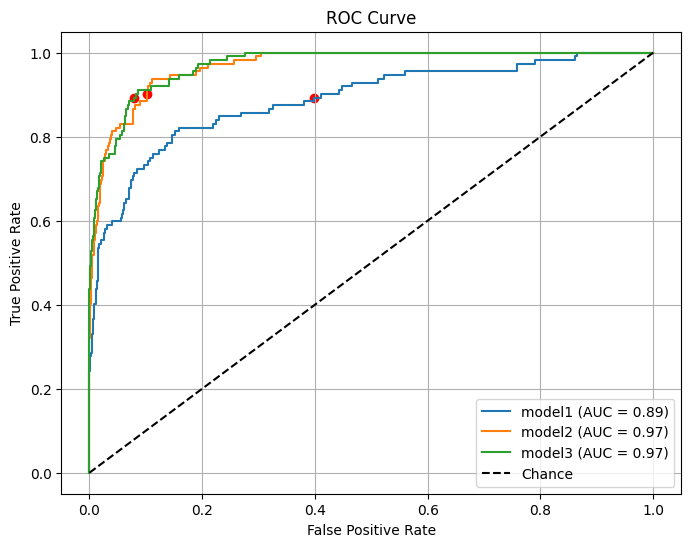

In [52]:
helper.plot_roc_auc_curve(best_threshold=True)

## 2. Data with new threshold

In [53]:
threshold =  0.12
evaluation_data = EvaluationData(
    file_path="/Users/marleenstreicher/Documents/git/menssana_case_study/data/solutions_case_study_task2_data.csv",
    threshold=threshold
)
data = evaluation_data.data
print(f"Sum of alarms (threshold={threshold}):", data["ai_model1_alarm"].sum())
helper = EvaluationHelper(data)


Sum of alarms (threshold=0.12): 223


## 3. Metrics with threshold X

In [54]:
fprs = helper.get_false_positive_rate()
pprint(fprs)

{'ai_model1_alarm': 0.19,
 'ai_model2_alarm': 0.12,
 'ai_model3_alarm': 0.08,
 'monitor_alarm': 0.36}


In [55]:
tprs=helper.get_true_positive_rate()
pprint(tprs)

{'ai_model1_alarm': 0.82,
 'ai_model2_alarm': 0.94,
 'ai_model3_alarm': 0.89,
 'monitor_alarm': 0.89}


In [56]:
tnrs=helper.get_true_negative_rate()
pprint(tnrs)

{'ai_model1_alarm': 0.81,
 'ai_model2_alarm': 0.88,
 'ai_model3_alarm': 0.92,
 'monitor_alarm': 0.64}


In [57]:
acc = helper.get_accuracy()
pprint(acc)

{'ai_model1_alarm': 0.81,
 'ai_model2_alarm': 0.88,
 'ai_model3_alarm': 0.92,
 'monitor_alarm': 0.67}
